In [2]:
import json, gzip
import numpy as np
from scipy.sparse import coo_matrix
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import torch
import torch_geometric.data as Data
from torch_geometric.utils.convert import to_networkx



## Task 1

### 1)

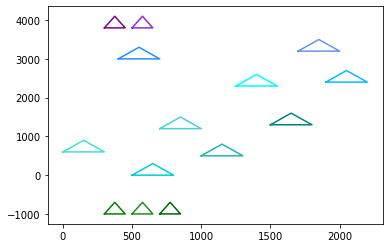

In [3]:
# circuit 1
# terminals
plt.plot([500, 800, 650, 500], [0, 0, 300, 0], color='darkturquoise') #nand4
plt.plot([0, 300, 150, 0], [600, 600, 900, 600], color='turquoise') #nand5
plt.plot([1000, 1300, 1150, 1000], [500, 500, 800, 500], color='lightseagreen') #nand6
plt.plot([700, 1000, 850, 700], [1200, 1200, 1500, 1200], color='mediumturquoise') #nand7
plt.plot([1500, 1800, 1650, 1500], [1300, 1300, 1600, 1300], color='teal') #nand8
plt.plot([1250, 1550, 1400, 1250], [2300, 2300, 2600, 2300], color='cyan') #nand9
plt.plot([1900, 2200, 2050, 1900], [2400, 2400, 2700, 2400], color='deepskyblue') #nand10
plt.plot([400, 700, 550, 400], [3000, 3000, 3300, 3000], color='dodgerblue') #nand11
plt.plot([1700, 2000, 1850, 1700], [3200, 3200, 3500, 3200], color='cornflowerblue') #nand12

# inputs
plt.plot([300, 450, 375, 300], [-1000, -1000, -700, -1000], color='green') #inputa
plt.plot([500, 650, 575, 500], [-1000, -1000, -700, -1000], color='forestgreen') #inputb
plt.plot([700, 850, 775, 700], [-1000, -1000, -700, -1000], color='darkgreen') #inputc

# outputs
plt.plot([300, 450, 375, 300], [3800, 3800, 4100, 3800], color='purple') #outputh
plt.plot([500, 650, 575, 500], [3800, 3800, 4100, 3800], color='blueviolet') #outputi

In [4]:
first = [
  {
    "name": "nand", 
    "id": 4, 
    "width": 300, 
    "height": 300, 
    "terms": [
      {
        "name": "a", 
        "id": 1, 
        "dir": 0, 
        "xloc": 500, 
        "yloc": 0
      }, 
      {
        "name": "b", 
        "id": 2, 
        "dir": 0, 
        "xloc": 800, 
        "yloc": 0
      }, 
      {
        "name": "out", 
        "id": 11, 
        "dir": 1, 
        "xloc": 650, 
        "yloc": 300
      }
    ]
  }, 
  {
    "name": "nand", 
    "id": 5, 
    "width": 300, 
    "height": 300, 
    "terms": [
      {
        "name": "a", 
        "id": 1, 
        "dir": 0, 
        "xloc": 0, 
        "yloc": 600
      }, 
      {
        "name": "b", 
        "id": 4, 
        "dir": 0, 
        "xloc": 300, 
        "yloc": 600
      }, 
      {
        "name": "out", 
        "id": 7, 
        "dir": 1, 
        "xloc": 150, 
        "yloc": 900
      }
    ]
  },
  {
    "name": "nand", 
    "id": 6, 
    "width": 300, 
    "height": 300, 
    "terms": [
      {
        "name": "a", 
        "id": 4, 
        "dir": 0, 
        "xloc": 1000, 
        "yloc": 600
      }, 
      {
        "name": "b", 
        "id": 2, 
        "dir": 0, 
        "xloc": 1300, 
        "yloc": 600
      }, 
      {
        "name": "out", 
        "id": 7, 
        "dir": 1, 
        "xloc": 1150, 
        "yloc": 900
      }
    ]
  },
  {
    "name": "nand", 
    "id": 7, 
    "width": 300, 
    "height": 300, 
    "terms": [
      {
        "name": "a", 
        "id": 5, 
        "dir": 0, 
        "xloc": 700, 
        "yloc": 1200
      }, 
      {
        "name": "b", 
        "id": 6, 
        "dir": 0, 
        "xloc": 1000, 
        "yloc": 1200
      }, 
      {
        "name": "out", 
        "id": 8, 
        "dir": 1, 
        "xloc": 850, 
        "yloc": 1500
      },
      {
        "name": "out1", 
        "id": 9, 
        "dir": 1, 
        "xloc": 850, 
        "yloc": 1500
      }
    ]
  },
  {
    "name": "nand", 
    "id": 8, 
    "width": 300, 
    "height": 300, 
    "terms": [
      {
        "name": "a", 
        "id": 7, 
        "dir": 0, 
        "xloc": 1500,
        "yloc": 1300
      }, 
      {
        "name": "b", 
        "id": 3, 
        "dir": 0, 
        "xloc": 1800, 
        "yloc": 1300
      }, 
      {
        "name": "out", 
        "id": 11, 
        "dir": 1, 
        "xloc": 1650, 
        "yloc": 1600
      },
      {
        "name": "out1", 
        "id": 9, 
        "dir": 1, 
        "xloc": 1650, 
        "yloc": 1600
      },
      {
        "name": "out2", 
        "id": 10, 
        "dir": 1, 
        "xloc": 1650, 
        "yloc": 1600
      }
    ]
  },
  {
    "name": "nand", 
    "id": 9, 
    "width": 300, 
    "height": 300, 
    "terms": [
      {
        "name": "a", 
        "id": 7, 
        "dir": 0, 
        "xloc": 1250, 
        "yloc": 2300
      }, 
      {
        "name": "b", 
        "id": 8, 
        "dir": 0, 
        "xloc": 1550, 
        "yloc": 2300
      }, 
      {
        "name": "out", 
        "id": 12, 
        "dir": 1, 
        "xloc": 1400, 
        "yloc": 2600
      }
    ]
  },
  {
    "name": "nand", 
    "id": 10, 
    "width": 300, 
    "height": 300, 
    "terms": [
      {
          "name": "a", 
          "id": 8, 
          "dir": 0, 
          "xloc": 1900, 
          "yloc": 2400
      }, 
      {
          "name": "b", 
          "id": 3, 
          "dir": 0, 
          "xloc": 2200, 
          "yloc": 2400
      }, 
      {
          "name": "out", 
          "id": 12, 
          "dir": 1, 
          "xloc": 2050, 
          "yloc": 2700
      }
    ]
  },
  {
    "name": "nand", 
    "id": 11, 
    "width": 300, 
    "height": 300, 
    "terms": [
      {
          "name": "a", 
          "id": 4, 
          "dir": 0, 
          "xloc": 400, 
          "yloc": 3000
      }, 
      {
          "name": "b", 
          "id": 8, 
          "dir": 0, 
          "xloc": 700, 
          "yloc": 3000
      }, 
      {
          "name": "out", 
          "id": 13, 
          "dir": 1, 
          "xloc": 550, 
          "yloc": 3300
      }
    ]
  },
  {
    "name": "nand", 
    "id": 12, 
    "width": 300, 
    "height": 300, 
    "terms": [
      {
          "name": "a", 
          "id": 9, 
          "dir": 0, 
          "xloc": 1700, 
          "yloc": 3200
      }, 
      {
          "name": "b", 
          "id": 10, 
          "dir": 0, 
          "xloc": 2000, 
          "yloc": 3200
      }, 
      {
          "name": "out", 
          "id": 14, 
          "dir": 1, 
          "xloc": 1850, 
          "yloc": 3500
      }
    ]
  },
  {
    "name": "OUTPUT_h", 
    "id": 13, 
    "width": 150, 
    "height": 300, 
    "terms": [
      {
        "name": "h", 
        "id": 11, 
        "dir": 1, 
        "xloc": 375, 
        "yloc": 3800
      }
    ]
  }, 
  {
    "name": "OUTPUT_i", 
    "id": 14, 
    "width": 150, 
    "height": 300, 
    "terms": [
      {
        "name": "i", 
        "id": 12, 
        "dir": 1, 
        "xloc": 575, 
        "yloc": 3800
      }
    ]
  }, 
  {
    "name": "INPUT_a", 
    "id": 1, 
    "width": 150, 
    "height": 300, 
    "terms": [
      {
        "name": "a", 
        "id": 4, 
        "dir": 0, 
        "xloc": 375, 
        "yloc": -700
      },
      {
        "name": "a1", 
        "id": 5, 
        "dir": 0, 
        "xloc": 375, 
        "yloc": -700
      }
    ]
  }, 
  {
    "name": "INPUT_b", 
    "id": 2, 
    "width": 150, 
    "height": 300, 
    "terms": [
      {
        "name": "b", 
        "id": 4, 
        "dir": 0, 
        "xloc": 575, 
        "yloc": -700
      },
      {
        "name": "b1", 
        "id": 6, 
        "dir": 0, 
        "xloc": 575, 
        "yloc": -700
      }
    ]
  }, 
  {
    "name": "INPUT_c", 
    "id": 3, 
    "width": 150, 
    "height": 300, 
    "terms": [
      {
        "name": "c", 
        "id": 8, 
        "dir": 1, 
        "xloc": 775, 
        "yloc": -700
      },
      {
        "name": "c1", 
        "id": 10, 
        "dir": 1, 
        "xloc": 775,
        "yloc": -700
      }
    ]
  }, 
]
circuit_1 = pd.DataFrame(first)


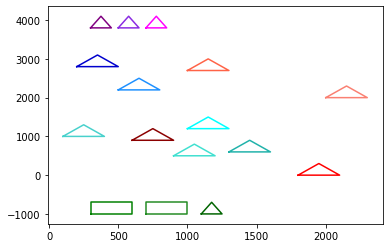

In [5]:
# circuit 2
# terminals
plt.plot([1800, 2100, 1950, 1800], [0, 0, 300, 0], color='red') #xor4
plt.plot([900, 1200, 1050, 900], [500, 500, 800, 500], color='turquoise') #nand5
plt.plot([1300, 1600, 1450, 1300], [600, 600, 900, 600], color='lightseagreen') #nand6
plt.plot([100, 400, 250, 100], [1000, 1000, 1300, 1000], color='mediumturquoise') #nand7
plt.plot([600, 900, 750, 600], [900, 900, 1200, 900], color='darkred') #xor8
plt.plot([1000, 1300, 1150, 1000], [1200, 1200, 1500, 1200], color='cyan') #nand9
plt.plot([2000, 2300, 2150, 2000], [2000, 2000, 2300, 2000], color='salmon') #xor10
plt.plot([500, 800, 650, 500], [2200, 2200, 2500, 2200], color='dodgerblue') #nand11
plt.plot([1000, 1300, 1150, 1000], [2700, 2700, 3000, 2700], color='tomato') #xor12
plt.plot([200, 500, 350, 200], [2800, 2800, 3100, 2800], color='mediumblue') #nand13

# inputs
plt.plot([300, 600, 600, 300, 300], [-1000, -1000, -700, -700, -1000], color='green') #inputa
plt.plot([700, 1000, 1000, 700, 700], [-1000, -1000, -700, -700, -1000], color='forestgreen') #inputb
plt.plot([1100, 1250, 1175, 1100], [-1000, -1000, -700, -1000], color='darkgreen') #inputc

# outputs
plt.plot([300, 450, 375, 300], [3800, 3800, 4100, 3800], color='purple') #outputc
plt.plot([500, 650, 575, 500], [3800, 3800, 4100, 3800], color='blueviolet') #outputs1
plt.plot([700, 850, 775, 700], [3800, 3800, 4100, 3800], color='fuchsia') #outputs0

In [6]:
second = [
  {
    "name": "nand", 
    "id": 5, 
    "width": 300, 
    "height": 300, 
    "terms": [
      {
        "name": "a", 
        "id": 1, 
        "dir": 0, 
        "xloc": 900, 
        "yloc": 500
      }, 
      {
        "name": "b", 
        "id": 2, 
        "dir": 0, 
        "xloc": 1200, 
        "yloc": 500
      }, 
      {
        "name": "out", 
        "id": 9, 
        "dir": 1, 
        "xloc": 1050,
        "yloc": 800
      }
    ]
  }, 
  {
    "name": "nand", 
    "id": 6, 
    "width": 300, 
    "height": 300, 
    "terms": [
      {
        "name": "a", 
        "id": 3, 
        "dir": 0, 
        "xloc": 1300, 
        "yloc": 600
      }, 
      {
        "name": "b", 
        "id": 4, 
        "dir": 0, 
        "xloc": 1600, 
        "yloc": 600
      }, 
      {
        "name": "out", 
        "id": 9, 
        "dir": 1, 
        "xloc": 1450, 
        "yloc": 900
      }
    ]
  }, 
  {
    "name": "nand", 
    "id": 7, 
    "width": 300, 
    "height": 300, 
    "terms": [
      {
        "name": "a", 
        "id": 1, 
        "dir": 0, 
        "xloc": 100, 
        "yloc": 1000
      }, 
      {
        "name": "b", 
        "id": 2, 
        "dir": 0, 
        "xloc": 400, 
        "yloc": 1000
      }, 
      {
        "name": "out", 
        "id": 13, 
        "dir": 1, 
        "xloc": 250, 
        "yloc": 1300
      }
    ]
  },
  {
    "name": "nand", 
    "id": 9, 
    "width": 300, 
    "height": 300, 
    "terms": [
      {
        "name": "a", 
        "id": 5, 
        "dir": 0, 
        "xloc": 1000, 
        "yloc": 1200
      }, 
      {
        "name": "b", 
        "id": 6, 
        "dir": 0, 
        "xloc": 1300, 
        "yloc": 1200
      }, 
      {
        "name": "out", 
        "id": 11, 
        "dir": 1, 
        "xloc": 1150, 
        "yloc": 1500
      },
      {
        "name": "out1", 
        "id": 12, 
        "dir": 1, 
        "xloc": 1150, 
        "yloc": 1500
      }
    ]
  },
  {
    "name": "nand", 
    "id": 11, 
    "width": 300, 
    "height": 300, 
    "terms": [
      {
        "name": "a", 
        "id": 8, 
        "dir": 0, 
        "xloc": 500, 
        "yloc": 2200
      }, 
      {
        "name": "b", 
        "id": 9, 
        "dir": 0, 
        "xloc": 800, 
        "yloc": 2200
      }, 
      {
        "name": "out", 
        "id": 13, 
        "dir": 1, 
        "xloc": 650, 
        "yloc": 2500
      }
    ]
  },
  {
    "name": "nand", 
    "id": 13, 
    "width": 300, 
    "height": 300, 
    "terms": [
      {
        "name": "a", 
        "id": 7, 
        "dir": 0, 
        "xloc": 200, 
        "yloc": 2800
      }, 
      {
        "name": "b", 
        "id": 11, 
        "dir": 0, 
        "xloc": 500, 
        "yloc": 2800
      }, 
      {
        "name": "out", 
        "id": 14, 
        "dir": 1, 
        "xloc": 350, 
        "yloc": 3100
      }
    ]
  },
  {
    "name": "xor", 
    "id": 4, 
    "width": 300, 
    "height": 300, 
    "terms": [
      {
        "name": "a", 
        "id": 1, 
        "dir": 0, 
        "xloc": 1800, 
        "yloc": 0
      }, 
      {
        "name": "b", 
        "id": 2, 
        "dir": 0, 
        "xloc": 2100, 
        "yloc": 0
      }, 
      {
        "name": "out", 
        "id": 6, 
        "dir": 1, 
        "xloc": 1950, 
        "yloc": 300
      },
      {
        "name": "out1", 
        "id": 10, 
        "dir": 1, 
        "xloc": 1950, 
        "yloc": 300
      }
    ]
  }, 
  {
    "name": "xor", 
    "id": 8, 
    "width": 300, 
    "height": 300, 
    "terms": [
      {
        "name": "a", 
        "id": 1, 
        "dir": 0, 
        "xloc": 600,
        "yloc": 900
      }, 
      {
        "name": "b", 
        "id": 2, 
        "dir": 0, 
        "xloc": 900, 
        "yloc": 900
      }, 
      {
        "name": "out", 
        "id": 11, 
        "dir": 1, 
        "xloc": 750, 
        "yloc": 1200
      },
      {
        "name": "out", 
        "id": 12, 
        "dir": 1, 
        "xloc": 750, 
        "yloc": 1200
      }
    ]
  },
  {
    "name": "xor", 
    "id": 10, 
    "width": 300, 
    "height": 300, 
    "terms": [
      {
        "name": "a", 
        "id": 3, 
        "dir": 0, 
        "xloc": 2000, 
        "yloc": 2000
      }, 
      {
        "name": "b", 
        "id": 4, 
        "dir": 0, 
        "xloc": 2300, 
        "yloc": 2000
      }, 
      {
        "name": "out", 
        "id": 16, 
        "dir": 1, 
        "xloc": 2150, 
        "yloc": 2300
      }
    ]
  },
  {
    "name": "xor", 
    "id": 12, 
    "width": 300, 
    "height": 300, 
    "terms": [
      {
        "name": "a", 
        "id": 8, 
        "dir": 0, 
        "xloc": 1000, 
        "yloc": 2700
      }, 
      {
        "name": "b", 
        "id": 9, 
        "dir": 0, 
        "xloc": 1300, 
        "yloc": 2700
      }, 
      {
        "name": "out", 
        "id": 15, 
        "dir": 1, 
        "xloc": 1150, 
        "yloc": 3000
      }
    ]
  },
  {
    "name": "OUTPUT_c", 
    "id": 14, 
    "width": 300, 
    "height": 300, 
    "terms": [
      {
        "name": "out", 
        "id": 13, 
        "dir": 1, 
        "xloc": 375, 
        "yloc": 4100
      }
    ]
  }, 
  {
    "name": "OUTPUT_s1", 
    "id": 15, 
    "width": 150, 
    "height": 300, 
    "terms": [
      {
        "name": "out", 
        "id": 12, 
        "dir": 1, 
        "xloc": 575, 
        "yloc": 4100
      }
    ]
  }, 
  {
    "name": "OUTPUT_s0", 
    "id": 16, 
    "width": 150, 
    "height": 300, 
    "terms": [
      {
        "name": "out", 
        "id": 10, 
        "dir": 1, 
        "xloc": 775, 
        "yloc": 4100
      }
    ]
  }, 
  {
    "name": "INPUT_a", 
    "id": 1, 
    "width": 300, 
    "height": 300, 
    "terms": [
      {
        "name": "a1", 
        "id": 7, 
        "dir": 0, 
        "xloc": 300, 
        "yloc": -700
      },
      {
        "name": "a11", 
        "id": 8, 
        "dir": 0, 
        "xloc": 300, 
        "yloc": -700
      },
      {
        "name": "a0", 
        "id": 5, 
        "dir": 0, 
        "xloc": 600, 
        "yloc": -700
      },
      {
        "name": "a01", 
        "id": 4, 
        "dir": 0, 
        "xloc": 600, 
        "yloc": -700
      }
    ]
  }, 
  {
    "name": "INPUT_b", 
    "id": 2, 
    "width": 300, 
    "height": 300, 
    "terms": [
      {
        "name": "b1", 
        "id": 7, 
        "dir": 0, 
        "xloc": 700, 
        "yloc": -700
      },
      {
        "name": "b11", 
        "id": 8, 
        "dir": 0, 
        "xloc": 700, 
        "yloc": -700
      },
      {
        "name": "b0", 
        "id": 5, 
        "dir": 0, 
        "xloc": 1000, 
        "yloc": -700
      },
      {
        "name": "b01", 
        "id": 4, 
        "dir": 0, 
        "xloc": 1000, 
        "yloc": -700
      }
    ]
  },
  {
    "name": "INPUT_c", 
    "id": 3, 
    "width": 150, 
    "height": 300, 
    "terms": [
      {
        "name": "c", 
        "id": 6, 
        "dir": 1, 
        "xloc": 1175, 
        "yloc": -700
      },
      {
        "name": "c1", 
        "id": 10, 
        "dir": 1, 
        "xloc": 1175, 
        "yloc": -700
      }
    ]
  }
]
circuit_2 = pd.DataFrame(second)

In [7]:
circuit_1

,name,id,width,height,terms
0,nand,4,300,300,"[{'name': 'a', 'id': 1, 'dir': 0, 'xloc': 500,..."
1,nand,5,300,300,"[{'name': 'a', 'id': 1, 'dir': 0, 'xloc': 0, '..."
2,nand,6,300,300,"[{'name': 'a', 'id': 4, 'dir': 0, 'xloc': 1000..."
3,nand,7,300,300,"[{'name': 'a', 'id': 5, 'dir': 0, 'xloc': 700,..."
4,nand,8,300,300,"[{'name': 'a', 'id': 7, 'dir': 0, 'xloc': 1500..."
5,nand,9,300,300,"[{'name': 'a', 'id': 7, 'dir': 0, 'xloc': 1250..."
6,nand,10,300,300,"[{'name': 'a', 'id': 8, 'dir': 0, 'xloc': 1900..."
7,nand,11,300,300,"[{'name': 'a', 'id': 4, 'dir': 0, 'xloc': 400,..."
8,nand,12,300,300,"[{'name': 'a', 'id': 9, 'dir': 0, 'xloc': 1700..."
9,OUTPUT_h,13,150,300,"[{'name': 'h', 'id': 11, 'dir': 1, 'xloc': 375..."


In [8]:
circuit_2

,name,id,width,height,terms
0,nand,5,300,300,"[{'name': 'a', 'id': 1, 'dir': 0, 'xloc': 900,..."
1,nand,6,300,300,"[{'name': 'a', 'id': 3, 'dir': 0, 'xloc': 1300..."
2,nand,7,300,300,"[{'name': 'a', 'id': 1, 'dir': 0, 'xloc': 100,..."
3,nand,9,300,300,"[{'name': 'a', 'id': 5, 'dir': 0, 'xloc': 1000..."
4,nand,11,300,300,"[{'name': 'a', 'id': 8, 'dir': 0, 'xloc': 500,..."
5,nand,13,300,300,"[{'name': 'a', 'id': 7, 'dir': 0, 'xloc': 200,..."
6,xor,4,300,300,"[{'name': 'a', 'id': 1, 'dir': 0, 'xloc': 1800..."
7,xor,8,300,300,"[{'name': 'a', 'id': 1, 'dir': 0, 'xloc': 600,..."
8,xor,10,300,300,"[{'name': 'a', 'id': 3, 'dir': 0, 'xloc': 2000..."
9,xor,12,300,300,"[{'name': 'a', 'id': 8, 'dir': 0, 'xloc': 1000..."


### 2

In [10]:
circuit_1_sort = circuit_1.sort_values(by='id', ignore_index=True)

node_indices = {node_id: index for index, node_id in enumerate(circuit_1_sort['id'])}

num_nodes = len(node_indices)
adjacency_matrix_1 = np.zeros((num_nodes, num_nodes), dtype=int)
node_types_1 = [''] * num_nodes

for _, row in circuit_1_sort.iterrows():
    source_node_id = row['id']
    source_node_index = node_indices[source_node_id]
    node_types_1[source_node_index] = row['name']
    for term in row['terms']:
        target_node_id = term['id']
        target_node_index = node_indices[target_node_id]

        adjacency_matrix_1[source_node_index][target_node_index] = 1

print("Adjacency Matrix for Circuit 1:")
print(adjacency_matrix_1)
print("\nNode Types in Order of Rows:")
print(node_types_1)

Adjacency Matrix for Circuit 1:
[[0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 1 1 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0]]

Node Types in Order of Rows:
['INPUT_a', 'INPUT_b', 'INPUT_c', 'nand', 'nand', 'nand', 'nand', 'nand', 'nand', 'nand', 'nand', 'nand', 'OUTPUT_h', 'OUTPUT_i']


In [11]:
circuit_2_sort = circuit_2.sort_values(by='id', ignore_index=True)

node_indices = {node_id: index for index, node_id in enumerate(circuit_2_sort['id'])}

num_nodes = len(node_indices)
adjacency_matrix_2 = np.zeros((num_nodes, num_nodes), dtype=int)
node_types_2 = [''] * num_nodes

for _, row in circuit_2_sort.iterrows():
    source_node_id = row['id']
    source_node_index = node_indices[source_node_id]

    node_types_2[source_node_index] = row['name']  # Set the node type for the source node


    for term in row['terms']:
        target_node_id = term['id']
        target_node_index = node_indices[target_node_id]

        adjacency_matrix_2[source_node_index][target_node_index] = 1

print("Adjacency Matrix for Circuit 2:")
print(adjacency_matrix_2)
print("\nNode Types in Order of Rows:")
print(node_types_2)

Adjacency Matrix for Circuit 2:
[[0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0]
 [1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]]

Node Types in Order of Rows:
['INPUT_a', 'INPUT_b', 'INPUT_c', 'xor', 'nand', 'nand', 'nand', 'xor', 'nand', 'xor', 'nand', 'xor', 'nand', 'OUTPUT_c', 'OUTPUT_s1', 'OUTPUT_s0']


### 3

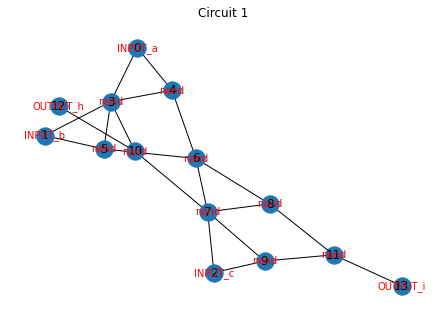

In [14]:
G1 = nx.Graph()

# Add nodes with types
node_types_1 = ['INPUT_a', 'INPUT_b', 'INPUT_c', 'nand', 'nand', 'nand', 'nand', 'nand', 'nand', 'nand', 'nand', 'nand', 'OUTPUT_h', 'OUTPUT_i']
for i, node_type in enumerate(node_types_1):
    G1.add_node(i, type=node_type)

# Add edges based on the adjacency matrix
for i in range(len(adjacency_matrix_1)):
    for j in range(len(adjacency_matrix_1)):
        if adjacency_matrix_1[i][j] == 1:
            G1.add_edge(i, j)

# Print the NetworkX graph
# print(G1.nodes(data=True))
# print(G1.edges())

# Draw the graph
pos = nx.spring_layout(G1)  # Define a layout for the graph
nx.draw(G1, pos, with_labels=True)

# Add labels for node types
labels = {node: node_type for node, node_type in enumerate(node_types_1)}  # Replace node_types with your list
nx.draw_networkx_labels(G1, pos, labels, font_size=10, font_color='red')

# Show the graph
plt.title('Circuit 1')
plt.show()


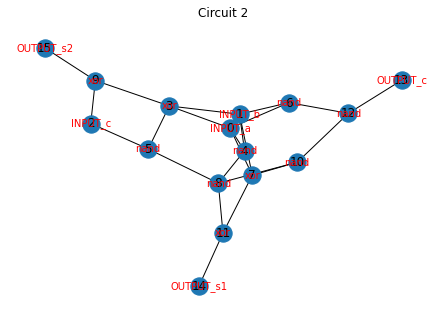

In [15]:
G2 = nx.Graph()

# Add nodes with types
node_types_2 = ['INPUT_a', 'INPUT_b', 'INPUT_c', 'xor', 'nand', 'nand', 'nand', 'xor', 'nand', 'xor', 'nand', 'xor', 'nand', 'OUTPUT_c', 'OUTPUT_s1', 'OUTPUT_s2']
for i, node_type in enumerate(node_types_2):
    G2.add_node(i, type=node_type)

# Add edges based on the adjacency matrix
for i in range(len(adjacency_matrix_2)):
    for j in range(len(adjacency_matrix_2)):
        if adjacency_matrix_2[i][j] == 1:
            G2.add_edge(i, j)

# Print the NetworkX graph
# print(G.nodes(data=True))
# print(G.edges())

# Draw the graph
pos = nx.spring_layout(G2)  # Define a layout for the graph
nx.draw(G2, pos, with_labels=True)

# Add labels for node types
labels = {node: node_type for node, node_type in enumerate(node_types_2)}  # Replace node_types with your list
nx.draw_networkx_labels(G2, pos, labels, font_size=10, font_color='red')

# Show the graph
plt.title('Circuit 2')
plt.show()


### 4

/Users/lisahwang/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/torch_geometric/data/storage.py:327: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'node_types_1', 'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


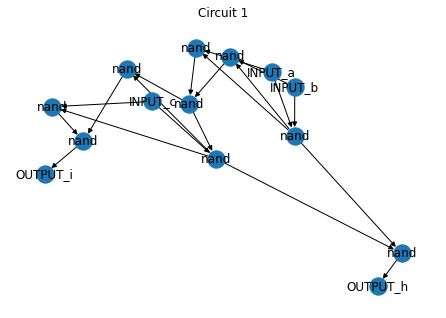

In [17]:
# Convert NetworkX graph to a PyTorch Geometric Data object
edge_index = torch.tensor(list(G1.edges())).T  # Transpose the numpy array

# Create a PyTorch Geometric Data object
data = Data.Data(x=None, edge_index=edge_index, y=None)

# Add node types as node attributes
node_types_dict = {i: node_types_1[i] for i in G1.nodes}
data.node_types_1 = [node_types_dict[i] for i in range(len(G1.nodes))]

# Print PyTorch Geometric Data object
# print(data)

G_from_data = to_networkx(data)

# Draw the graph
pos = nx.spring_layout(G_from_data)  # Define a layout for the graph
nx.draw(G_from_data, pos, with_labels=True, labels={i: node_types_1[i] for i in G_from_data.nodes()})

# Show the graph
plt.title('Circuit 1')
plt.show()


/Users/lisahwang/opt/anaconda3/envs/dsc80/lib/python3.8/site-packages/torch_geometric/data/storage.py:327: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'node_types_2', 'edge_index'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


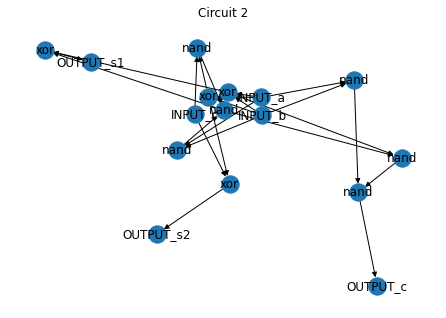

In [18]:
# Convert NetworkX graph to a PyTorch Geometric Data object
edge_index = torch.tensor(list(G2.edges())).T  # Transpose the numpy array

# Create a PyTorch Geometric Data object
data = Data.Data(x=None, edge_index=edge_index, y=None)

# Add node types as node attributes
node_types_dict = {i: node_types_2[i] for i in G2.nodes}
data.node_types_2 = [node_types_dict[i] for i in range(len(G2.nodes))]

# Print PyTorch Geometric Data object
# print(data)

G_from_data = to_networkx(data)

# Draw the graph
pos = nx.spring_layout(G_from_data)  # Define a layout for the graph
nx.draw(G_from_data, pos, with_labels=True, labels={i: node_types_2[i] for i in G_from_data.nodes()})

# Show the graph
plt.title('Circuit 2')
plt.show()



## Task 2

In [19]:
start_node = 0
target_node = 13

bfs_tree = nx.bfs_edges(G1, source=start_node)
shortest_path = list(nx.shortest_path(G1, source=start_node, target=target_node))

print("BFS Edges:")
for edge in bfs_tree:
    print(edge)

print(f"Shortest Path from {start_node} to {target_node}:")
print(shortest_path)


BFS Edges:
(0, 3)
(0, 4)
(3, 1)
(3, 10)
(3, 5)
(4, 6)
(10, 7)
(10, 12)
(6, 8)
(7, 2)
(7, 9)
(8, 11)
(11, 13)
Shortest Path from 0 to 13:
[0, 4, 6, 8, 11, 13]


adding 1 to each node to make up for index starting at 0
BFS detected order: 1, 5, 7, 9, 12, 14

In [20]:
start_node = 0
target_node = 15

bfs_tree = nx.bfs_edges(G2, source=start_node)
shortest_path = list(nx.shortest_path(G2, source=start_node, target=target_node))

print("BFS Edges:")
for edge in bfs_tree:
    print(edge)

print(f"Shortest Path from {start_node} to {target_node}:")
print(shortest_path)

BFS Edges:
(0, 3)
(0, 4)
(0, 6)
(0, 7)
(3, 1)
(3, 5)
(3, 9)
(4, 8)
(6, 12)
(7, 10)
(7, 11)
(5, 2)
(9, 15)
(12, 13)
(11, 14)
Shortest Path from 0 to 15:
[0, 3, 9, 15]


adding 1 to each node to make up for index starting at 0
BFS detected order: 1, 4, 10, 16